## House Price Prediction using Machine Learning [Linear Regression Single Variable]

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [16]:
df = pd.read_csv('C:\\Users\\KAREN J FERNANDES\\anaconda3\\Files\\Machine Learning\\homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [31]:
df.dtypes

area     int64
price    int64
dtype: object

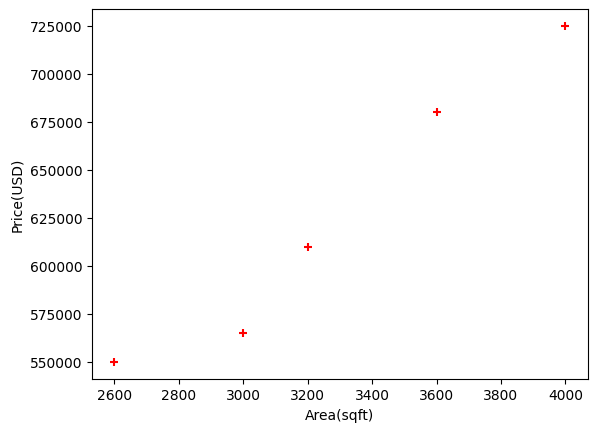

In [17]:
%matplotlib inline
plt.xlabel("Area(sqft)")
plt.ylabel("Price(USD)")
plt.scatter(df.area, df.price,marker='+',color='red')

In [49]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [50]:
predicted_price = reg.predict([[3300]])
predicted_price

c:\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([628715.75342466])

In [53]:
print("copy_X:", reg.copy_X)
print("fit_intercept:", reg.fit_intercept)
print("n_jobs:", reg.n_jobs)
print("normalize:", reg.normalize)

copy_X: True
fit_intercept: True
n_jobs: None
normalize: deprecated


These parameters are attributes of the LinearRegression class in scikit-learn. Here's what each of them means:

copy_X: This parameter controls whether the input data X is copied and stored in the LinearRegression object. If set to True, it ensures that the original data is not modified during the fitting process. It's set to True by default.

fit_intercept: This parameter determines whether to calculate the intercept for the linear regression model. If set to True, an intercept will be calculated during the fitting process. It's also set to True by default.

n_jobs: This parameter specifies the number of parallel jobs to use for the computation. If set to None (the default), then one job is used. Setting n_jobs to an integer value greater than 1 allows the computation to be parallelized across multiple cores if available.

normalize: This parameter was used to control whether the regressors (independent variables) are normalized before regression. If set to True, the regressors are normalized by subtracting the mean and dividing by the l2-norm. However, in recent versions of scikit-learn, normalization is deprecated, and this parameter is ignored. It's still present for compatibility reasons but will be removed in future versions.

In [56]:
#This model basically calculates the predicted price based on y = mx + b
#coefficients are the constants. y, m and b are coefficients.
#m = slope or gradient, b = intercept
#y = mx + b => price = m * area + b
reg.coef_

array([135.78767123])

In [55]:
reg.intercept_

180616.43835616432

In [59]:
#y = mx + b
#price = m * area + b
y = 135.78767123 * 3300 + 180616.43835616432
y

628715.7534151643

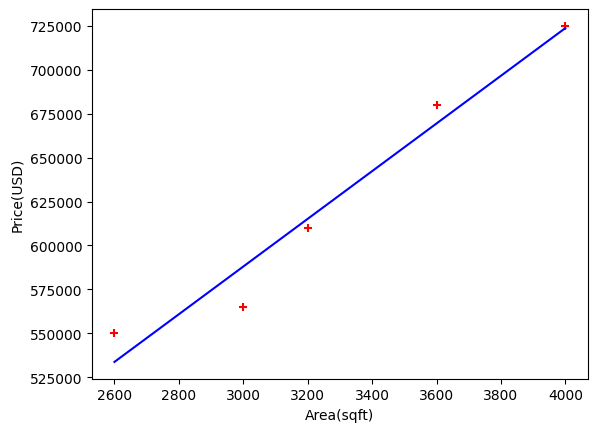

In [74]:
%matplotlib inline
plt.xlabel("Area(sqft)")
plt.ylabel("Price(USD)")
plt.scatter(df.area, df.price,marker='+',color='red')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

## Price prediction based on model created using only area from the following dataset

In [63]:
area = pd.read_csv('C:\\Users\\KAREN J FERNANDES\\anaconda3\\Files\\Machine Learning\\areas.csv')
area

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [64]:
reg.predict(area)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [65]:
p = reg.predict(area)

In [70]:
area['price'] = p

In [71]:
area

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [73]:
area.to_csv('predicted_prices.csv', index=False)